In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/Google_Stock_Price/Google_Stock_Price_Train.csv"
train_df = pd.read_csv(train_url, error_bad_lines=False, header=0, index_col=None, usecols=["Date", "Open"], parse_dates=["Date"])
train_df = train_df.Open.values.reshape(-1,1)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
train_df = scaler.fit_transform(train_df)

In [4]:
X_train = []
y_train = []

for i in range(60, train_df.shape[0]):
  fetch_back_X = train_df[i-60:i, 0]
  fetch_back_y = train_df[i, 0]
  X_train.append(fetch_back_X)
  y_train.append(fetch_back_y)

X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [ ]:
def build_lstm():
  lstm = Sequential()
  lstm.add(LSTM(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
  lstm.add(Dropout(0.20))
  lstm.add(LSTM(units=50, activation="tanh", return_sequences=True))
  lstm.add(Dropout(0.20))
  lstm.add(LSTM(units=50, activation="tanh", return_sequences=True))
  lstm.add(Dropout(0.20))
  lstm.add(LSTM(units=50, activation="tanh"))
  lstm.add(Dropout(0.20))
  lstm.add(Dense(units=1))
  lstm.compile(optimizer='rmsprop', loss='mean_squared_error')
  return lstm

lstm = KerasRegressor(build_fn = build_lstm)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 200]
              }
grid_search = GridSearchCV(estimator = lstm,
                           param_grid = parameters,
                           scoring='neg_mean_squared_error',
                           cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters, best_accuracy, sep='\n')
# {'batch_size': 32, 'epochs': 200}
# -0.0008960473301603204

In [8]:
test_url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/Google_Stock_Price/Google_Stock_Price_Test.csv"
test_df = pd.read_csv(test_url, error_bad_lines=False, header=0, index_col=None, usecols=["Date", "Open"], parse_dates=["Date"])
test_df = test_df.Open.values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
test_df = scaler.fit_transform(test_df)

In [9]:
train_test = np.concatenate((train_df, test_df), axis=0)
train_test.shape

(1278, 1)

In [10]:
X_test = []

for i in range(60, (len(train_test) - len(train_df))+60):
  fetch_back_X = train_test[i-60:i, 0]
  X_test.append(fetch_back_X)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

In [14]:
lstm = Sequential()
lstm.add(LSTM(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm.add(Dropout(0.20))
lstm.add(LSTM(units=50, activation="tanh", return_sequences=True))
lstm.add(Dropout(0.20))
lstm.add(LSTM(units=50, activation="tanh", return_sequences=True))
lstm.add(Dropout(0.20))
lstm.add(LSTM(units=50, activation="tanh"))
lstm.add(Dropout(0.20))
lstm.add(Dense(units=1))
lstm.compile(optimizer='rmsprop', loss='mean_squared_error')
lstm.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0329
Epoch 2/200
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 3/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0120
Epoch 4/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0101
Epoch 5/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0090
Epoch 6/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0095
Epoch 7/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0069
Epoch 8/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0073
Epoch 9/200
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0075
Epoch 10/200
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0054
Epoch 11/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0065
Epoch 12/200
1198/1198 [==============================] - 5s 4ms/step - lo

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016A: 5s - l - ETA
Epoch 95/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 96/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 97/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 98/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 99/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 100/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 101/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 102/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 103/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 104/200
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017
Epoch 105/200
1198/1198 [==============================] -

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 189/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 190/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 191/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012A: 1s - loss
Epoch 192/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 193/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 194/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 195/200
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0012
Epoch 196/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 197/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011
Epoch 198/200
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 199/200
1198/1198 [==============================]

In [21]:
pred_price = lstm.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
real_price = pd.read_csv(test_url, error_bad_lines=False, header=0, index_col=None, usecols=["Date", "Open"], parse_dates=["Date"])
real_price = real_price.Open.values.reshape(-1,1)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real_price, pred_price, squared=False)

28.64051963950937

In [18]:
real_price.std()

14.742443962925547

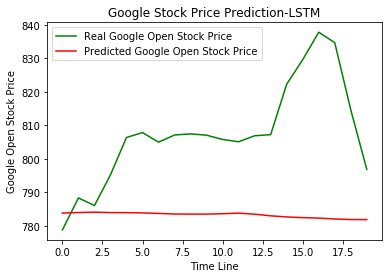

In [26]:
plt.plot(real_price, color = 'green', label = 'Real Google Open Stock Price')
plt.plot(pred_price, color = 'red', label = 'Predicted Google Open Stock Price')
plt.title('Google Stock Price Prediction-LSTM')
plt.xlabel('Time Line')
plt.ylabel('Google Open Stock Price')
plt.legend(loc='best')
plt.show()